### 1. Generate a Synthetic Dataset

First, let's create a synthetic dataset for a binary classification problem using `sklearn.datasets.make_classification`.

In [2]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate a synthetic dataset for binary classification
X, y = make_classification(
    n_samples=1000,          # Number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_redundant=5,           # Number of redundant features
    n_repeated=2,            # Number of repeated features
    n_classes=2,             # Number of target classes
    random_state=42          # For reproducibility
)

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (1000, 21)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,-0.965971,-4.083222,0.742536,4.758031,3.862131,2.198416,-1.615355,0.971105,-0.812169,-1.615355,...,0.532418,4.464401,1.688499,3.862131,-1.450016,1.229877,0.669111,0.675820,0.121585,0
1,-0.081634,0.697994,1.804714,1.501068,1.093509,0.317548,-0.535982,1.993888,-0.366603,-0.535982,...,-0.236098,2.235500,0.296276,1.093509,1.152251,-3.163869,-1.481827,-1.938014,3.883104,1
2,-0.571736,0.765453,0.111636,4.269736,1.280064,0.398235,2.611323,-0.262405,1.762473,2.611323,...,1.312471,0.437786,0.615634,1.280064,1.307135,-0.039836,-3.290545,0.027699,-1.535882,1
3,-0.730813,2.170382,-4.472493,-1.883337,-1.978719,-0.785772,-3.071837,0.757920,0.245292,-3.071837,...,0.175835,-1.170256,0.294323,-1.978719,0.087357,0.043611,0.189531,-0.673849,-1.595267,0
4,0.755185,0.469361,0.773533,0.121682,0.201814,1.765667,0.225088,0.817219,1.084478,0.225088,...,-2.468933,-0.934296,0.233255,0.201814,1.110753,-1.595172,1.052310,-1.601653,0.922307,0


### 2. Split Data into Training and Testing Sets

We'll split the dataset into training and testing sets to evaluate the model's performance on unseen data.

In [3]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (700, 20)
X_test shape: (300, 20)
y_train shape: (700,)
y_test shape: (300,)


### 3. Feature Scaling

Logistic Regression can be sensitive to the scale of the features. We'll use `StandardScaler` to normalize the data.

In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")

Features scaled successfully.


### 4. Train the Logistic Regression Model

Now, let's train a Logistic Regression model using the scaled training data.

In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for small datasets and L1/L2 regularization

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


### 5. Evaluate the Model

Finally, we'll evaluate the model's performance on the testing data using metrics like accuracy, precision, recall, and F1-score.

Accuracy: 0.8333

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       150
           1       0.84      0.82      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300


Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,127,23
Actual 1,27,123


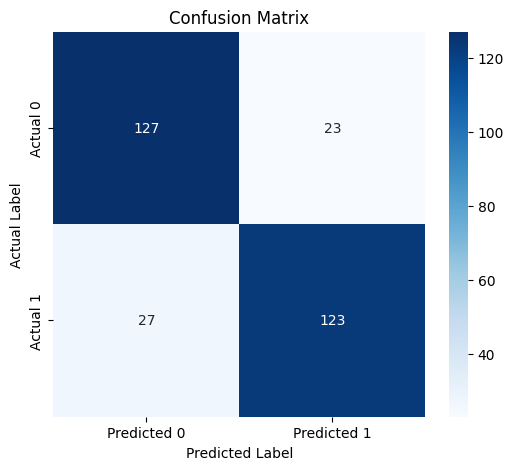

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
display(pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()